In [ ]:
!pip install tensorflow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0rc0, 2.12.0rc1)
ERROR: No matching distribution found for tensorflow==2.1.0


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
print(tf.__version__)

2.11.0


In [ ]:
# 머신러닝 시작하기
dense = Dense(units=1, input_shape=[1])
model = Sequential([dense])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict([10.0]))

- 텐서플로는 Sequential 클래스로 층을 정의한다.
- keras.layers API를 사용하여 층을 정의할 수 있다.
컴퓨터는 입력할 데이터 간의 관계를 모르기 때문에 임의의 값으로 놓고 추측한 다음 손실함수에 따라 좋고 나쁨을 측정한다
- 추측에 사용되는 것을 옵티마이저라고 하며 위의 경우는 sgd라는 확률적 경사 하강법을 사용
- 추측한 값에서 오차를 계산할 결과가 주어졌을 때 또 다른 추측을 만드는 수학함수
- 과정 반복을 통해 손실을 최소화하며 추측한 값이 정답에 더 가깝게 만든다.
- 마지막으로는 지정한 epochs 만큼 학습을 반복한다.

In [ ]:
# 신경망이 학습한 것 확인하기

print('신경망이 학습한 것:{}'.format(dense.get_weights()))

신경망이 학습한 것:[array([[1.9975243]], dtype=float32), array([-0.99232435], dtype=float32)]


In [15]:
# 컴퓨터 비전 소개
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

trainig_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9761 - accuracy: 0.6921
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6339 - accuracy: 0.7706
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5669 - accuracy: 0.8025
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5207 - accuracy: 0.8220
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5018 - accuracy: 0.8285


In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.4164 - accuracy: 0.1000


[2.416425943374634, 0.10000000149011612]

In [18]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[0.1257129  0.05488903 0.23484713 0.08052519 0.04538276 0.08300455
 0.19524188 0.04969458 0.10679933 0.02390259]
9


In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print('\n정확도 95%에 도달하여 훈련을 멈춥니다!')
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5026 - accuracy: 0.8232
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3765 - accuracy: 0.8640
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3374 - accuracy: 0.8768
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3137 - accuracy: 0.8861
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2966 - accuracy: 0.8900
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8962
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - accuracy: 0.8992
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9040
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9071
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

# 용어 정리 및 공부
### 활성화 함수
- 입력 신호의 총합을 출력 신호로 변환하는 함수 (가중치가 달린 입력신호 + 편향)
- 활성화 함수는 비선형 함수여야 한다.
- ex. h(x) = cx라는 선형 함수가 활성화 함수 일때 층을 3개 쌓으면 h(x)=c^3*x
- 곧 y=ax에서 c^3과 같아 1층만 쌓은 네트워크와 같기 때문이다.

1. 계단 함수
- 입력값의 합이 임곗값을 넘으면 0을 출력하고 넘지 못하면 1을 출력
- 미분이 불가능해 사용되지 않음

2. 임곗값 함수
- 입력값이 임곗값보다 크면 그대로 전달, 작다면 특정값으로 전달
- 마찬가지로 미분이 불가능해 사용되지 않음

3. 시그모이드 함수
- 1 / (1 + e^-x)
- 출력값이 0 ~ 1 범위이기 때문에 Exploding Gradient 현상 방지가능
- 그러나 입력값이 아무리 커도 1이기 때문에 Vanishing Gradient 발생
- 이외에 다양한 이유로 은닉층에서 활성화 함수로 사용하지 않으며, 출력층에서만 사용

4. 하이퍼볼릭 탄젠트 함수
- (e^x - e^-x) / (e^x + e^-x)
- 시그모이드 함수와 유사하지만 출력값의 중심이 0을 갖는다. (학습효율성 증가)
- 출력값의 범위가 더 넓고 다양하기에 Vanishing Gradient가 덜 발생

5. ReLU
- 0보다 작거나 같으면 0, 아니면 선형 함수에 값을 대입하는 구조
- 양수일 경우 출력값이 제한되지 않아 기울기 소실 발생 x
- 수식이 간단해 연산이 빠르다.
- 하지만 입력값이 음수라면 가중치나 편향이 갱신되지 않음

6. LeakyReLU
- 0보다 작으면 negative_slope * x, 아니면 선형 함수에 값을 대입
- ReLU와 다른 점은 입력값이 음수일 경우 작은 값이라도 출력하여 기울기 갱신

7. PReLU
- LeakyReLU와 형태가 동일하지만 negative_slope을 고정값이 아닌, 학습을 통해 갱신하도록 함
- negative_slope가 학습 데이터 셋에 영향을 받음

8. ELU
- 0보다 작으면 negative_slope * (e^x - 1), 아니면 선형 함수에 값을 대입
- 음의 기울기에서 비선형 구조를 갖으며, 0인 경우에도 출력값이 급변하지 않음
- 따라서 경사 하강법의 수렴속도가 빠르다.
- 하지만 더 복잡한 연산으로 인해 학습 속도가 느려진다
- 수렴속도는 몇 번의 핛브으로 최적값을 찾는지, 학습 속도는 완료까지의 전체 시간

9. softmax
- e^zk \ (sum_{k=1}^n e^zi)
- 특정 출력값이 k번째 클래스에 속할 확률을 계산하며 따라서 은닉층이 아닌 출력층에서 사용
- 분류모델에서 사용

- 출처 : https://076923.github.io/posts/AI-6/

### 정규화
- 값의 범위를 0 ~ 1사이로 바꿔주는 것

1. min-max Normalization
- (X - MIN) / (MAX - MIN)

2. Z-score Normalization

- 정규화 값은 이상치에 민감하다는 단점이 있다.
### 표준화
- 값의 범위를 평균 0 , 분산 1이 되도록 바꿔주는 것

#### 장점
1. 큰 값을 갖는 변수에 편향되지 않는다
2. internal covariate shift를 줄일 수 있다.
3. 손실함수의 표면을 매끄럽게 한다.
4. 빠른 최적화
- 출처 :  https://hyen4110.tistory.com/20

- Normalization 관련 공부 자료 : https://sonsnotation.blogspot.com/2020/11/8-normalization.html

### 손실함수
- 지도학습 시 알고리즘이 예측한 값과 실제 정답 차이를 비교하기 위한 함수

1. MSE(Mean Squaredd Error)
- 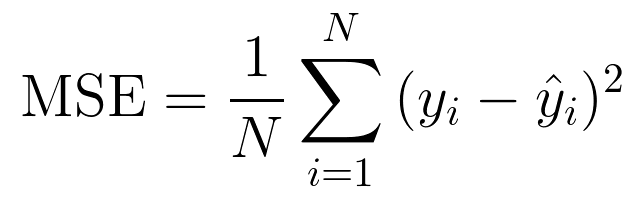
- 예측한 값과 실제 값 사이의 평균 제곱 오차

2. RMSE(Root Mean Squared Error)
- 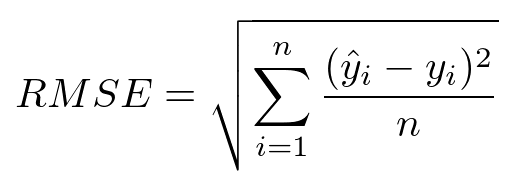
- MSE에 루트를 씌워 값의 제곱에 의한 값의 왜곡을 줄여준다.

3. Binary Crossentropy
- 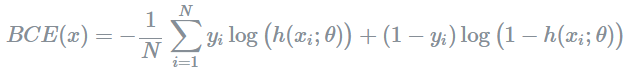
- 실제 레이블과 예측 레이블 간의 교차 엔트로피 손실 계산

4. Categorical Crossentropy
- 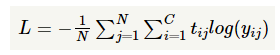
- 레이블 클래스가 2개 초과일 경우 사용

5. Sparse categorical Crossentropy, Facal loss 등등

- 출처 : https://velog.io/@rcchun/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98%EC%9D%98-%EC%A2%85%EB%A5%98

### 옵티마이저
- 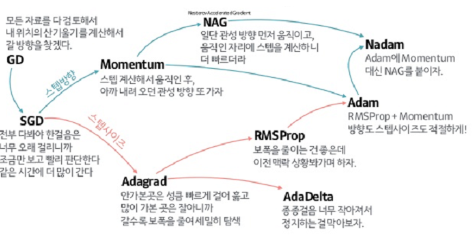
- 그림 출처 : https://www.slideshare.net/yongho/ss-79607172

1. 경사 하강법
2. 확률적 경사 하강법
3. Momentum
4. Nesterov Accelerated Gradient (NAG)
5. Adam
6. AdaGrad
7. RMSProp
8. AdaMax
9. Nadam

### 콜백
1. ReduceLROnPlateau
- 모델이 개선되지 않을 때 learning rate을 동적으로 조정하여 모델을 개선하는 효과

2. ModelCheckpoint
- 모델이 특정 조건 만족 시, 모델의 가중치를 중간 저장

3. EarlyStopping
- 정의한 epoch 동안 모델의 성능 지표가 개선되지 않을 경우 조기 종료

## 추가로 공부가 필요한 내용
- 옵티마이저 종류별 정의 

- 콜백 함수 실습

- Normalization 관련 추가 공부

- Vanishing Gradient 와 Exploding Gradient

- 활성화함수에 대한 세부 내용 공부